### Case study On Supervised Learning

###### Importing applicable libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### 1. Reading the dataset into Python environment.

In [4]:
dataset = pd.read_excel ('iris1.xls')

In [5]:
dataset.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###### Checking the basic details of the dataset:

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [9]:
dataset.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

###### Checking the missing values in the dataset:

In [10]:
dataset.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

###### Insights:
                The dataset contains 150 rows and 5 columns.
                We have missing values in SL,SW,PL columns.So we need to fill those missing values in all the columns in the dataset.

### 2. Necessary Preprocessing Steps to be taken:

In [11]:
dataset.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

###### Filling the missing values present in the dataset. (Handling Null values)

In [12]:
dataset["SL"] =dataset["SL"].fillna(dataset["SL"].mean())
dataset["SW"] =dataset["SW"].fillna(dataset["SW"].mean())
dataset["PL"] =dataset["PL"].fillna(dataset["PL"].mean())


In [13]:
dataset.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
## We can also fill null values by,

obj_cols = list(dataset.select_dtypes('object').columns)
for o in obj_cols:
    dataset[o].fillna("NULL",inplace = True)

In [15]:
dataset.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

###### Checking and handling the outliers if present in the dataset by plotting boxplot of SL,SW,PL, PW :

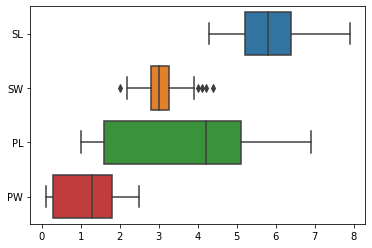

In [16]:
sns.boxplot(data= dataset, orient='h')
plt.show()

In [17]:
dataset.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099250,0.831400,0.800726
SW,-0.099250,1.000000,-0.413551,-0.340278
PL,0.831400,-0.413551,1.000000,0.936389
PW,0.800726,-0.340278,0.936389,1.000000


##### Insights:
                There are no outliers in SL and PL and PW variables in the dataset but there are outliers in SW.
                Since the outliers are nearer to the upper and lower limits,we have to consider that in the dataset while handling.

###### Checking SW outliers

In [18]:
Q1=np.percentile(dataset['SW'], 25, interpolation = 'midpoint')
Q2=np.percentile(dataset['SW'], 50, interpolation = 'midpoint')
Q3=np.percentile(dataset['SW'], 75, interpolation = 'midpoint')

In [19]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [20]:
dataset['SW'].median()

3.0

In [21]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR

In [22]:
print("IQR is : ",IQR)
print("Lower Limit is :",low_lim)
print("Upper limit is: ",up_lim)

IQR is :  0.4500000000000002
Lower Limit is : 2.1249999999999996
Upper limit is:  3.9250000000000003


In [23]:
dataset1 = dataset
dataset1.drop("PW",axis=1)
dataset1

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [24]:
dataset[(dataset['SW'] > 3.93) ^ (dataset['SW'] < 2.12)]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


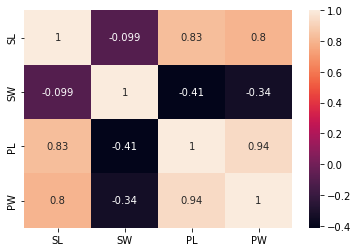

In [25]:
plt.figure(figsize=(6, 4))
corr_matrix = dataset.drop('Classification', axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [26]:
dataset['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

#### Label Encoding the column "Classification" :


In [27]:
from sklearn.preprocessing import LabelEncoder
laben=LabelEncoder()
dataset["Classification"] = laben.fit_transform(dataset["Classification"])
dataset.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [28]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns=['Classification'],axis =1)
y = dataset['Classification']

In [29]:
y = laben.fit_transform(y)

### 3. Classification Models:

#####  Splitting the data :

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.20)

In [31]:
X_train.shape

(120, 4)

##### 1.Logistic Regression Model:

In [32]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

In [33]:
#print("Accuracy of logistic regression model is : ",model.score(X_test, y_test)*100)

print('Accuracy of Logistic Regression model is :',accuracy_score(y_test,y_pred)*100)
print("Precision is :",precision_score(y_test,y_pred,average='weighted'))
print("Recall is : ",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is :",f1_score(y_test,y_pred,average='weighted'))

Accuracy of Logistic Regression model is : 100.0
Precision is : 1.0
Recall is :  1.0
F1 Score is : 1.0


In [34]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

##### 2. KNN  Classification Model:


In [35]:
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train,y_train)
prediction = model.predict(X_test)


In [36]:
print('The accuracy of KNN model is : ', accuracy_score(prediction,y_test)*100)
print("Precision is : ",precision_score(prediction,y_test,average = 'weighted'))
print("Recall is : ",recall_score(prediction,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(prediction,y_test,average ='weighted'))

The accuracy of KNN model is :  96.66666666666667
Precision is :  0.9703703703703703
Recall is :  0.9666666666666667
F1 Score is :  0.96692242114237


In [37]:
confusion_matrix(prediction,y_test)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 11]], dtype=int64)

##### 3.Random Forest Classification Model :

In [38]:
rnf = RandomForestClassifier(n_estimators=100)
rnf_model = rnf.fit(X_train, y_train)
rnf_predict = rnf_model.predict(X_test)

In [39]:
rnf.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
rnf_predict=rnf.predict(X_test)
#f1_score(y_test,rnf_predict,average='weighted')

In [41]:
print('Accuracy of Random Forest model is : ',accuracy_score(rnf_predict, y_test) *100)
print("Precision is : ",precision_score(rnf_predict,y_test,average = 'weighted'))
print("Recall is : ",recall_score(rnf_predict,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(rnf_predict,y_test,average ='weighted'))

Accuracy of Random Forest model is :  100.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0


In [42]:
confusion_matrix(y_test,rnf_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

##### 4. Decision Tree Classification Model:

In [43]:
dtree = DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

In [44]:
print('Accuracy of Decision Tree model is : ', accuracy_score(dtree_predict, y_test)*100)
print("Precision is : ",precision_score(dtree_predict,y_test,average = 'weighted'))
print("Recall is : ",recall_score(dtree_predict,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(dtree_predict,y_test,average ='weighted'))

Accuracy of Decision Tree model is :  100.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0


In [45]:
confusion_matrix(y_test,dtree_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

##### 5.Support Vector Machine Model of Classification : (SVC)

In [46]:
from sklearn import svm 
from sklearn.svm import SVC

In [47]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
pred=svm_linear.predict(X_test)

In [48]:
print('The accuracy of Support Vector Machine model is: ', accuracy_score(pred,y_test)*100)
print("Precision is : ",precision_score(pred,y_test,average='weighted'))
print("Recall is : ",recall_score(pred,y_test,average='weighted'))
print("F1 Score is : ",f1_score(pred,y_test,average='weighted'))

The accuracy of Support Vector Machine model is:  100.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0


In [49]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### Conclusion:
            

   #####     After conducting all the types of classification, Logistic Regression, Random Forest, Decision Tree and Support Vector Machine models gave the highest accuracy of 100% for this dataset. Their Accuracy score,Precision score, Recall score and F1 score are 1.0 which is the best. KNN model gave 96.7 % accuracy which is also a best result but while comparing with other models,it is least considered. 